In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
from scipy.stats import norm

from math import log, sqrt, exp
from scipy import stats  
import numpy as np
import math

In [2]:
def bsm_mcs(S_0, K, T, q, r, sigma, option='call'):
    I = 20000  
    M = 50     
    dt = T / M  
    S = np.zeros((M + 1, I))  
    S[0] = S_0  
    for t in range(1, M + 1):
        z = np.random.standard_normal(I)  
        S[t] = S[t - 1] * np.exp((r - q - 0.5 * sigma ** 2) * dt + sigma * dt ** 0.5 * z)  
        if option == 'call':
            hT = np.maximum(S[-1] - K, 0) 
        else:
            hT = np.maximum(K - S[-1], 0)  
    value = exp(-r * T) * np.mean(hT)   
    return value

#another method
def bsm_mcs2(S0, K, T, q, r, sigma, option='call'):
    I = 20000  
    z = np.random.standard_normal(I)
    S=S0*np.exp((r - q - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * z)
    if option == 'call':
        hT = np.maximum(S - K, 0) 
    else:
        hT = np.maximum(K - S, 0)  
    value = np.exp(-r * T) * np.mean(hT)   
    return value

## Relationship between S0 and Option Price

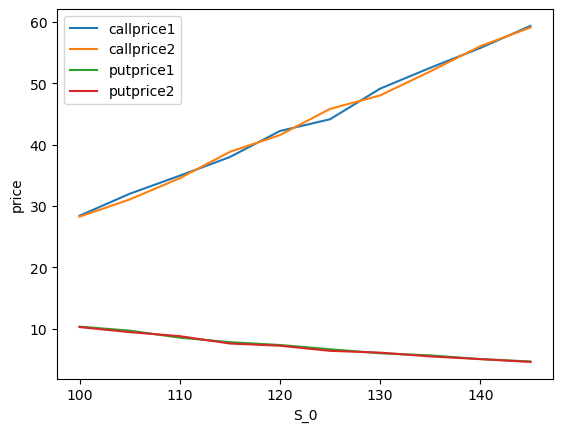

In [3]:
# initial value
S_0 = [100,105,110,115,120,125,130,135,140,145]
K = 105.0  
T = 10
r = 0.05  
sigma = 0.2  
q=0.02 

call=[]
put=[]
call2=[]
put2=[]
for i in range(0,10):
    callprice = bsm_mcs2(S_0[i], K, T,q, r, sigma, 'call')
    call2.append(callprice)
    putprice = bsm_mcs2(S_0[i], K, T,q, r, sigma, 'put')
    put2.append(putprice)
    
for i in range(0,10):
    callprice = bsm_mcs(S_0[i], K,  T, q,r, sigma, 'call')
    call.append(callprice)
    putprice = bsm_mcs(S_0[i], K,  T,q, r, sigma, 'put')
    put.append(putprice)

plt.plot(S_0,call)
plt.plot(S_0,call2)
plt.plot(S_0,put)
plt.plot(S_0,put2)
plt.legend(['callprice1','callprice2','putprice1','putprice2'],loc='upper left')
plt.xlabel('S_0')
plt.ylabel('price')
plt.show()

## Relationship between K, T and Option Price

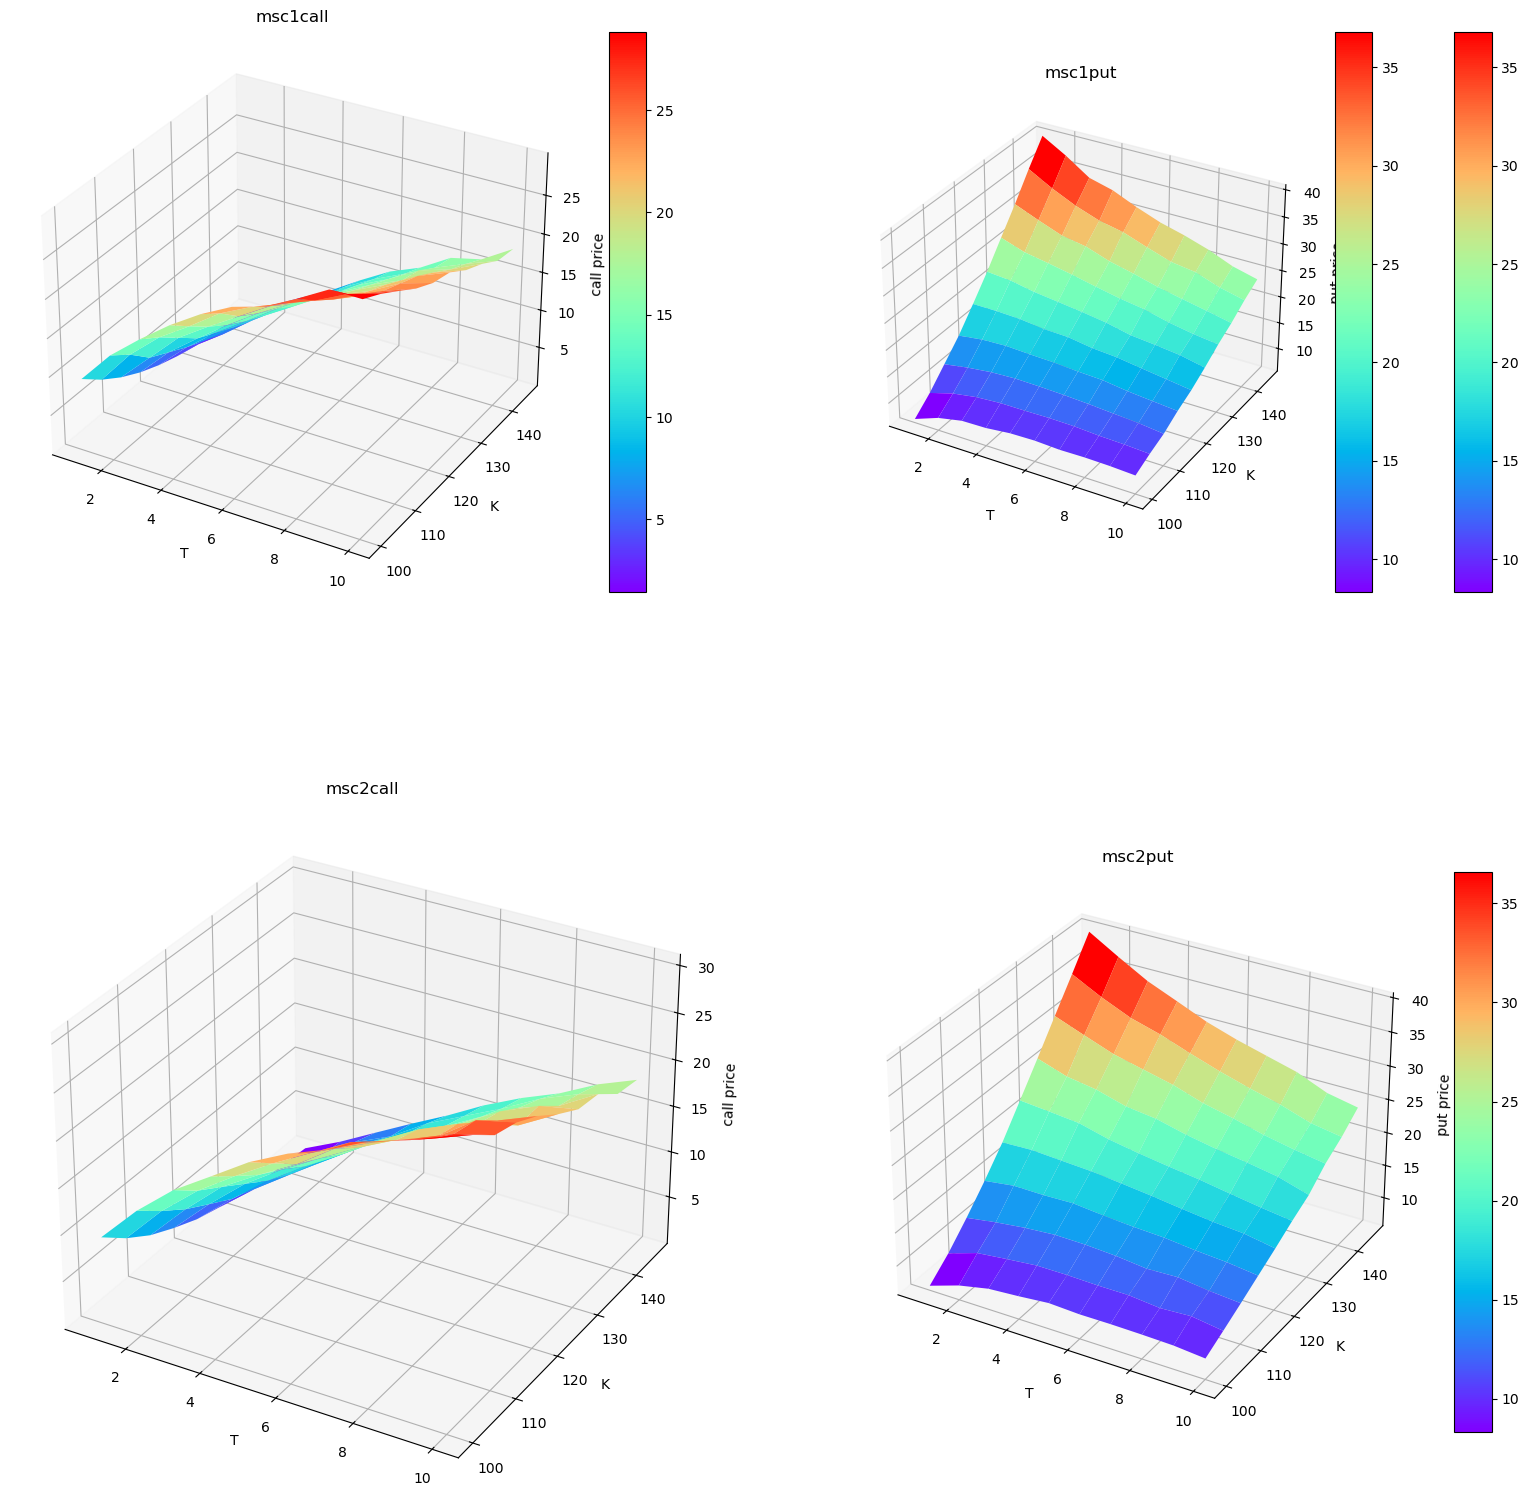

In [4]:
# initial value
S_0 = 100.0  
K=[100.0,105.0,110.0,115.0,120.0,125.0,130.0,135.0,140.0,145.0]
T = [1,2,3,4,5,6,7,8,9,10]  
r = 0.05  
sigma = 0.2  
q=0.02 

call=np.zeros(shape=(10,10))
put=np.zeros(shape=(10,10))
call2=np.zeros(shape=(10,10))
put2=np.zeros(shape=(10,10))
for i in range(0,10):
    for j in range(0,10):
        callprice = bsm_mcs2(S_0, K[j], T[i], q, r, sigma, 'call')
        call2[i][j]=callprice
        putprice = bsm_mcs2(S_0, K[j], T[i], q, r, sigma, 'put')
        put2[i][j]=putprice
    
for i in range(0,10):
    for j in range(0,10):
        callprice = bsm_mcs(S_0, K[j], T[i], q, r, sigma, 'call')
        call[i][j]=callprice
        putprice = bsm_mcs(S_0, K[j], T[i], q, r, sigma, 'put')
        put[i][j]=putprice


from mpl_toolkits.mplot3d import Axes3D 

x = T
y = K
x_, y_ = np.meshgrid(x,y,indexing='ij')
z_1 = call  
z_2 = put
z_3 = call2
z_4 = put2
fig = plt.figure(figsize=(20, 20), facecolor='white') 
sub1 = fig.add_subplot(221, projection='3d')
surf1 = sub1.plot_surface(x_, y_, z_1, cmap='rainbow')
cb1 = fig.colorbar(surf1, shrink=0.8, aspect=15) 
sub1.set_xlabel(r"T")
sub1.set_ylabel(r"K")
sub1.set_zlabel(r"call price")
sub1.set_title('msc1call')


sub2 = fig.add_subplot(222, projection='3d')
surf2 = sub2.plot_surface(x_, y_, z_2, cmap='rainbow')
cb2 = fig.colorbar(surf2, shrink=0.8, aspect=15)
sub2.set_xlabel(r"T")
sub2.set_ylabel(r"K")
sub2.set_zlabel(r"put price")
sub2.set_title('msc1put')


sub3 = fig.add_subplot(223, projection='3d')
surf3 = sub3.plot_surface(x_, y_, z_3, cmap='rainbow')
cb = fig.colorbar(surf2, shrink=0.8, aspect=15)
sub3.set_xlabel(r"T")
sub3.set_ylabel(r"K")
sub3.set_zlabel(r"call price")
sub3.set_title('msc2call')


sub4 = fig.add_subplot(224, projection='3d')
surf4 = sub4.plot_surface(x_, y_, z_4, cmap='rainbow')
cb4 = fig.colorbar(surf4, shrink=0.8, aspect=15)
sub4.set_xlabel(r"T")
sub4.set_ylabel(r"K")
sub4.set_zlabel(r"put price")
sub4.set_title('msc2put')
plt.show()